In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import random

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pothole_dataset_directory = "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset"
os.listdir(pothole_dataset_directory)

['sample_video.mp4', 'valid', 'train']

# Processing Train Images

In [ ]:
train_images_folder_path = "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/images"
train_labels_folder_path = "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/labels"

array([[[0.02352941, 0.02352941, 0.02352941],
        [0.4392157 , 0.4392157 , 0.4392157 ],
        [0.39607844, 0.39607844, 0.39607844],
        ...,
        [0.5294118 , 0.47843137, 0.44313726],
        [0.6156863 , 0.5764706 , 0.5411765 ],
        [0.5254902 , 0.49019608, 0.4627451 ]],

       [[0.02352941, 0.02352941, 0.02352941],
        [0.4509804 , 0.4509804 , 0.4509804 ],
        [0.43529412, 0.43529412, 0.43529412],
        ...,
        [0.87058824, 0.81960785, 0.78431374],
        [0.8862745 , 0.84705883, 0.8117647 ],
        [0.78039217, 0.74509805, 0.7176471 ]],

       [[0.01960784, 0.01960784, 0.01960784],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        [0.49411765, 0.49411765, 0.49411765],
        ...,
        [0.68235296, 0.6313726 , 0.59607846],
        [0.7490196 , 0.70980394, 0.6745098 ],
        [0.74509805, 0.70980394, 0.68235296]],

       ...,

       [[0.24705882, 0.24705882, 0.24705882],
        [0.34509805, 0.34509805, 0.34509805],
        [0.42745098, 0

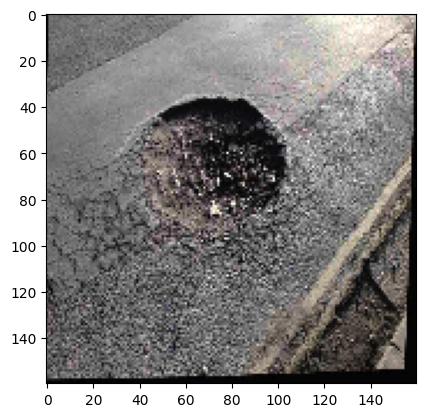

In [ ]:
def load_image(path,img_size = 160,show = False):
    '''
    Loads an image from a given image path , converts to a (img_size,img_size) size  and returns it as a numpy array .

    path (string): path to image

    img_size (int): size of expected output image  ----> (img_size,img_size) format eg, if img_size = 160 , output image will be (160,160)
                    default value = 160

    show (bool): whether to show the image or not
                 default value = False

    returns: numpy array of image
    '''
    image = load_img(path, target_size=(img_size, img_size))
    image = img_to_array(image) / 255.0

    if show == True:
        plt.imshow(image)

    return np.array(image)

load_image(os.path.join(train_images_folder_path,sorted(os.listdir(train_images_folder_path))[422]),show = True)

In [ ]:
train_images_array = []

for image in sorted(os.listdir(train_images_folder_path)):
    train_images_array.append(load_image(os.path.join(train_images_folder_path,image)))

train_images_array = np.array(train_images_array)
np.save(os.path.join('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/images_array','train_images_array.npy'), train_images_array)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

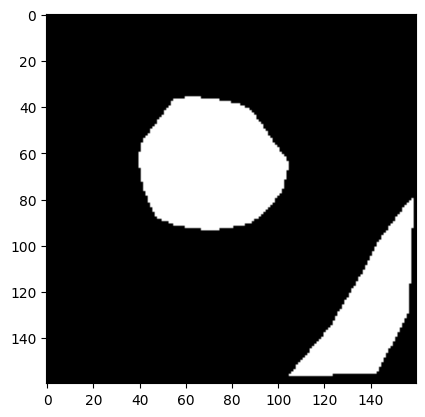

In [ ]:
def generate_mask_from_label(label_array,mask_size = 160,show = True):
    mask = np.zeros((mask_size,mask_size))

    file1 = open(label_array, 'r')
    while True:
        poly = file1.readline()
        if not poly:
            break

        s = poly.split()
        #only single class of segmentation so we dont care about classes
        coord = np.array(s[1:], dtype='float32').reshape(-1,2)
        coord = coord * mask_size
        coord = coord.astype(int)
        cv2.fillPoly(mask, [coord], color = (255,255,255))


    if show==True:
      plt.imshow(mask,cmap = 'gray')

    return mask/255.0

    #cv2.imwrite(directory+'/masks/'+img_list[i], mask)

generate_mask_from_label(os.path.join(train_labels_folder_path,sorted(os.listdir(train_labels_folder_path))[422]),show = True)

In [ ]:
#!mkdir "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/masks_array"

train_masks_array = []
for label in sorted(os.listdir(train_labels_folder_path)):
  train_masks_array.append(generate_mask_from_label(os.path.join(train_labels_folder_path,label),show = False))
train_masks_array = np.array(train_masks_array)
np.save(os.path.join('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/masks_array','train_masks_array.npy'), train_masks_array)


# Processing Validation Data

In [ ]:
valid_images_folder_path = "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/images"
valid_labels_folder_path = "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/labels"

In [ ]:
valid_images_array = []

for image in sorted(os.listdir(valid_images_folder_path)):
    valid_images_array.append(load_image(os.path.join(valid_images_folder_path,image)))

valid_images_array = np.array(valid_images_array)
np.save(os.path.join('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/images_array','valid_images_array.npy'), valid_images_array)


In [ ]:
#!mkdir "/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/masks_array"

valid_masks_array = []
for label in sorted(os.listdir(valid_labels_folder_path)):
  valid_masks_array.append(generate_mask_from_label(os.path.join(valid_labels_folder_path,label),show = False))
valid_masks_array = np.array(valid_masks_array)
np.save(os.path.join('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/masks_array','valid_masks_array.npy'), valid_masks_array)


# Load Image and Mask Arrays

In [ ]:
train_images_array = np.load('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/images_array/train_images_array.npy')
train_masks_array = np.load('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/train/masks_array/train_masks_array.npy')

print(train_images_array.shape)
print(train_masks_array.shape)

(720, 160, 160, 3)
(720, 160, 160)


In [ ]:
valid_images_array = np.load('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/images_array/valid_images_array.npy')
valid_masks_array = np.load('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/masks_array/valid_masks_array.npy')

print(valid_images_array.shape)
print(valid_masks_array.shape)

(60, 160, 160, 3)
(60, 160, 160)


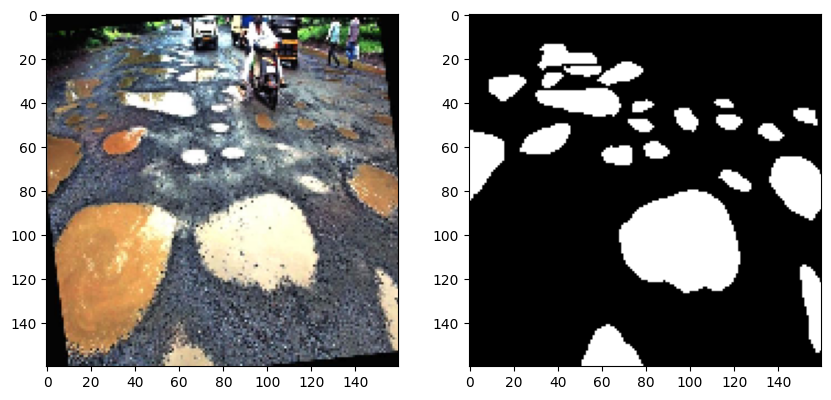

In [ ]:
sorted_images = sorted(os.listdir(train_images_folder_path))
sorted_masks = sorted(os.listdir(train_labels_folder_path))
n = 5
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(train_images_array[n])
plt.subplot(1,2,2)
plt.imshow(train_masks_array[n],cmap = 'gray')

[198, 629, 673, 616, 428]


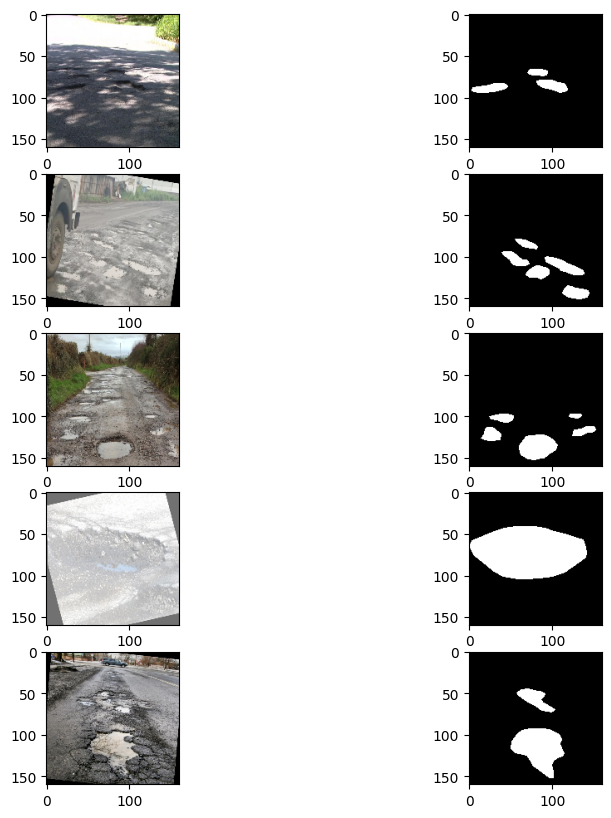

In [ ]:
def view_random_image_and_mask(images_array,masks_array,num = 20):

    random_indices = random.sample(range(images_array.shape[0]),num)
    print(random_indices)
    plt.figure(figsize = (10,10))

    for i in range(num):
        plt.subplot(num,2,2*i + 1)
        plt.imshow(images_array[random_indices[i]])
        plt.subplot(num,2,2*i + 2)
        plt.imshow(masks_array[random_indices[i]],cmap = 'gray')


view_random_image_and_mask(train_images_array,train_masks_array,num = 5)







# Unet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Building the convolutional block
def ConvBlock(inputs, filters=64):
    # Taking first input and implementing the first conv block
    conv1 = layers.Conv2D(filters, kernel_size = (3,3), padding = "same")(inputs)
    batch_norm1 = layers.BatchNormalization()(conv1)
    act1 = layers.ReLU()(batch_norm1)

    # Taking first input and implementing the second conv block
    conv2 = layers.Conv2D(filters, kernel_size = (3,3), padding = "same")(act1)
    batch_norm2 = layers.BatchNormalization()(conv2)
    act2 = layers.ReLU()(batch_norm2)

    return act2

# Building the encoder
def encoder(inputs, filters=64):
    # Collect the start and end of each sub-block for normal pass and skip connections
    enc1 = ConvBlock(inputs, filters)
    MaxPool1 = layers.MaxPooling2D(strides = (2,2))(enc1)
    return enc1, MaxPool1

# Building the decoder
def decoder(inputs, skip, filters=64):
    # Upsampling and concatenating the essential features
    Upsample = layers.Conv2DTranspose(filters, (2, 2), strides=2, padding="same")(inputs)
    Connect_Skip = layers.Concatenate()([Upsample, skip])
    out = ConvBlock(Connect_Skip, filters)
    return out

def get_U_Net(image_size):
    inputs = layers.Input(image_size)

    # Construct the encoder blocks and increasing the filters by a factor of 2
    skip1, encoder_1 = encoder(inputs, 64)
    skip2, encoder_2 = encoder(encoder_1, 64*2)
    skip3, encoder_3 = encoder(encoder_2, 64*4)
    skip4, encoder_4 = encoder(encoder_3, 64*8)

    # Preparing the next block
    conv_block = ConvBlock(encoder_4, 64*16)

    # Construct the decoder blocks and decreasing the filters by a factor of 2
    decoder_1 = decoder(conv_block, skip4, 64*8)
    decoder_2 = decoder(decoder_1, skip3, 64*4)
    decoder_3 = decoder(decoder_2, skip2, 64*2)
    decoder_4 = decoder(decoder_3, skip1, 64)

    outputs = layers.Conv2D(3, 1, padding="same", activation="sigmoid")(decoder_4)
    model = models.Model(inputs, outputs)
    return model

In [ ]:
input_shape = (160, 160, 3)
model = get_U_Net(input_shape)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 160, 160, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 160, 160, 64)   │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 160, 160, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 160, 160, 64)   │         36,928 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 160, 160, 64)   │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 160, 160, 64)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 80, 80, 64)     │              0 │ re_lu_1[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 80, 80, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 80, 80, 128)    │            512 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 80, 80, 128)    │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 80, 80, 128)    │        147,584 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 80, 80, 128)    │            512 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 80, 80, 128)    │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 40, 40, 128)    │              0 │ re_lu_3[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 40, 40, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4

 Total params: 31,055,427 (118.47 MB)

 Trainable params: 31,043,651 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [ ]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy",metrics = ['accuracy'])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("pothole_segmentation.keras", save_best_only=True)
]


In [ ]:
History =  model.fit( train_images_array,
                      train_masks_array,
                      epochs = 25,
                      batch_size = 32,
                      steps_per_epoch= int(len(train_images_array)/16),
                      validation_steps=10,
                      validation_data=(valid_images_array,valid_masks_array),
                      shuffle = True,
                      callbacks = callbacks)

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 363ms/step - accuracy: 0.8444 - loss: 0.3926 - val_accuracy: 0.3970 - val_loss: 3.2857
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 378ms/step - accuracy: 0.8424 - loss: 0.3850 - val_accuracy: 0.4940 - val_loss: 1.5514
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 372ms/step - accuracy: 0.8586 - loss: 0.3571 - val_accuracy: 0.3893 - val_loss: 2.5995
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 360ms/step - accuracy: 0.8573 - loss: 0.3546 - val_accuracy: 0.4918 - val_loss: 1.1953
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 362ms/step - accuracy: 0.8648 - loss: 0.3359 - val_accuracy: 0.5796 - val_loss: 1.1019
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.8617 - loss: 0.3458 - val_accuracy: 0.7295 - val_loss: 0.5403
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 371ms/step - accuracy: 0.8665 - loss: 0.3315 - val_accuracy: 0.6548 - val_loss: 0.8771
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 367ms/step - accuracy: 0.8668 - loss: 0.3290 - val_accu

In [ ]:
os.listdir(train_images_folder_path)

['pic-10-_jpg.rf.500c683a687e403f4cdade4826a84b5b.jpg',
 'pic-10-_jpg.rf.1d433d21e11d000b6b498eacb88fe4a9.jpg',
 'pic-1-_jpg.rf.e238c9bf3fe82e8ac55b0014a27fc529.jpg',
 'pic-1-_jpg.rf.49882cdb272111f43a6656b1494a4918.jpg',
 'pic-101-_jpg.rf.8380b58f6540ec91db66934b342f7f9e.jpg',
 'pic-1-_jpg.rf.8d95dd1d29760a2634a45cc7fdd84b31.jpg',
 'pic-10-_jpg.rf.5a901c212d899a7dc7dc78be7de892c0.jpg',
 'pic-101-_jpg.rf.4abe48a3d2a5e556908bf4286446e5ce.jpg',
 'pic-101-_jpg.rf.1e32a49f89a38974ded11bba8dd3e56b.jpg',
 'pic-100-_jpg.rf.17047bb032a49c96643c5f2108bb99dd.jpg',
 'pic-100-_jpg.rf.8c9076ee84698f90f04765f4e794a819.jpg',
 'pic-100-_jpg.rf.ebc3af260e989e6f9e1e9221b9dff6b0.jpg',
 'pic-111-_jpg.rf.39065e4e7f12e6c9d4e829f9df001cec.jpg',
 'pic-104-_jpg.rf.f986cb78d75fc164de95ac33c56d9474.jpg',
 'pic-110-_jpg.rf.ddb9b30f00ca7dfad4235fcd67610a9b.jpg',
 'pic-115-_jpg.rf.1da712be935af009c0a9e04f0276f225.jpg',
 'pic-115-_jpg.rf.2ac2c551c23ad08dd5599f320c8dd310.jpg',
 'pic-11-_jpg.rf.39503b2272330e0dd57ffe9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


(-0.5, 159.5, 159.5, -0.5)

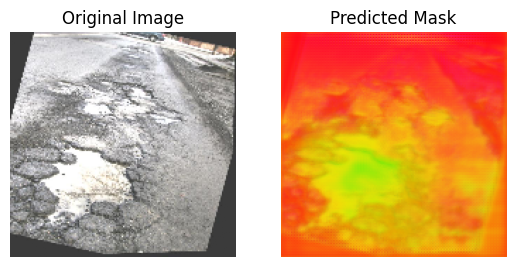

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img_size = 160

img_path =os.path.join(train_images_folder_path,'pic-260-_jpg.rf.76bee172574bbacef55e6935f031bf20.jpg')
image = load_img(img_path, target_size=(img_size, img_size))
image = img_to_array(image) / 255.0

image = tf.expand_dims(image, axis=0)
predictions = model.predict(image)

plt.subplot(1,2,1)
plt.imshow(image[0])
plt.title('Original Image')
plt.axis('off')

#  mask
plt.subplot(1,2,2)
plt.imshow(predictions.squeeze(),cmap = 'gray')
plt.title('Predicted Mask')
plt.axis('off')

In [ ]:
model.save('/content/drive/MyDrive/Minor Project/Pothole Detection/models/pothole_final.keras')

In [ ]:
def predict(image_path,img_size = 160, show = True):

    from tensorflow.keras.preprocessing.image import load_img, img_to_array

    img_path = image_path
    image = load_img(img_path, target_size=(img_size, img_size))
    image = img_to_array(image) / 255.0

    image = tf.expand_dims(image, axis=0)
    predictions = model.predict(image)

    if show == True:
        plt.subplot(1,2,1)
        plt.imshow(image[0])
        plt.title('Original Image')
        plt.axis('off')

        #  mask
        plt.subplot(1,2,2)
        plt.imshow(predictions.squeeze(),cmap = 'gray')
        plt.title('Predicted Mask')
        plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


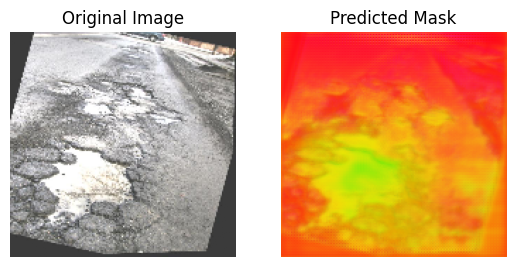

In [ ]:
predict(os.path.join(train_images_folder_path,'pic-260-_jpg.rf.76bee172574bbacef55e6935f031bf20.jpg'),show = True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


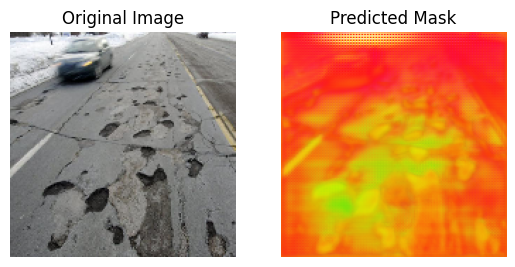

In [ ]:
predict('/content/drive/MyDrive/Minor Project/Pothole Detection/Pothole_dataset/valid/images/pic-116-_jpg.rf.ddcb9d0e0bcf2a1a5096c4f04e6b7f9e.jpg')